In [3]:
## plot cell map from a certain data (with individual cells)

## now we can use this sheet to label the index for cell map plotting
# import inscopix_cnmfe
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os 
from PIL import Image
%config InlineBackend.figure_format = 'svg'


def plot_composite_fov(footprints, colormap='gist_rainbow', ax = None):
    '''
    Plots all footprints on a single composite field of view.
    
    Args:
        footprints (array):
            n_cells x rows x columns array of footprints
        colormap (str, optional)
            Colormap to use. Each cell will be assigned a random color from this map (defaults to 'gist_rainbow').
    Returns:
        tuple of fig, ax
            fig = matplotlib figure handle
            ax = matplotlib axis handle
    '''
    
    # fig, ax = plt.subplots(figsize=(6,6))
    
    # start with an array of zeros
    composite_fov = np.zeros((footprints.shape[1], footprints.shape[2], 3))
    cmap_vals = cm.get_cmap(colormap)
    
    np.random.seed(0)

    for cell_id in range(footprints.shape[0]):
        # select a random color for this cell
        color = cmap_vals(np.random.rand())
        for color_channel in range(3):
            composite_fov[:,:,color_channel] += color[color_channel]*footprints[cell_id]/np.max(footprints[cell_id])
    # set all values > 1 (where cells overlap) to 1:
    composite_fov[np.where(composite_fov > 1)] = 1
    composite_fov[np.where(composite_fov > 0)] = 1 # make it half bright
    
    # show the image
    ax.imshow(composite_fov)
    # ax.text(x=footprints.shape[2]*0.05,y=160,s='All neurons n={}'.format(footprints.shape[0]),color='w',ha='left',va='top',size=12)
    # ax.text(x=footprints.shape[2]*0.05,y=160,s='All neurons n={}'.format(footprints.shape[0]),color='w',ha='left',va='top',size=12)
    ax.text(x=footprints.shape[2]*0.97,y=5,s='All neurons n={}'.format(footprints.shape[0]),color='w',ha='right',va='top',size=12)

        
    # fig.tight_layout()
    return ax

def checkConsecutive(l,n=3):
    # n = len(l) - 1
    n = n-1 # diff will be one less than all elements in the list
    return (sum(np.diff(sorted(l)) == 1) >= n) 

def erode_footprint(footprints,percentile=99.9):
    footprints_copy = footprints.copy()
    for i in range(footprints_copy.shape[0]):
        footprints_copy[i,:,:][footprints_copy[i,:,:]<np.percentile(footprints_copy[i,:,:],percentile)] = 0
    return footprints_copy

def plot_composite_fov_label(footprints, colormap='gist_rainbow', ax = None,label_idx=[]):
    '''
    Plots all footprints on a single composite field of view.
    
    Args:
        footprints (array):
            n_cells x rows x columns array of footprints
        colormap (str, optional)
            Colormap to use. Each cell will be assigned a random color from this map (defaults to 'gist_rainbow').
    Returns:
        tuple of fig, ax
            fig = matplotlib figure handle
            ax = matplotlib axis handle
    '''
    
    # fig, ax = plt.subplots(figsize=(6,6))
    
    # start with an array of zeros
    composite_fov = np.zeros((footprints.shape[1], footprints.shape[2], 3))
    cmap_vals = cm.get_cmap(colormap)
    
    np.random.seed(0)

    for cell_id in range(footprints.shape[0]):
        # select a random color for this cell
        color = cmap_vals(np.random.rand())

        if cell_id not in label_idx:
          # only label red channel
        #   for color_channel in range(3):
        #     if color_channel == 0:
        #       composite_fov[:,:,color_channel] += color[color_channel]*footprints[cell_id]/np.max(footprints[cell_id])
        #     else:
        #       composite_fov[:,:,color_channel] -= color[color_channel]*footprints[cell_id]/np.max(footprints[cell_id])
        # else:
          # assign the color to each of the three channels, normalized by the footprint peak
          for color_channel in range(3):
              composite_fov[:,:,color_channel] += color[color_channel]*footprints[cell_id]/np.max(footprints[cell_id])
        # set all values > 1 (where cells overlap) to 1:
    composite_fov[np.where(composite_fov > 1)] = 1
    composite_fov[np.where(composite_fov > 0)] = 0.25 # make it half bright

    ## Do it again but make the label ROI to black (0) first before plotting
    for cell_id in range(footprints.shape[0]):
        # select a random color for this cell
        color = cmap_vals(np.random.rand())
        if cell_id in label_idx:
          # make ROI background as a negative value so the overlapping parts with other neurons are not getting weird
          for color_channel in range(3):
            composite_fov[:,:,color_channel] -=color[color_channel]*footprints[cell_id]/np.max(footprints[cell_id])
            composite_fov[np.where(composite_fov < 0)] = 0 # make negative value to 0
          for color_channel in range(3):
            if color_channel in [0]:
              composite_fov[:,:,color_channel] += color[color_channel]*(footprints[cell_id]/np.max(footprints[cell_id])>0)*10000 # make it to extreme value so it's >0.25
            if color_channel in [1]:
              composite_fov[:,:,color_channel] += color[color_channel]*(footprints[cell_id]/np.max(footprints[cell_id])>0)*10000
        
    # set all values > 1 (where cells overlap) to 1:
    composite_fov[np.where(composite_fov > 1)] = 1
    # set all milk neurons ROIs to 1
    composite_fov[np.where(composite_fov > 0.25)] = 1
    
    # show the image
    ax.imshow(composite_fov)
    ax.text(x=footprints.shape[2]*0.97,y=5,s='All neurons n={}'.format(footprints.shape[0]),color='w',ha='right',va='top',size=16)
    ax.text(x=footprints.shape[2]*0.97,y=13,s='milk neurons n={}'.format(len(label_idx)),color='yellow',ha='right',va='top',size=16)
        
    fig.tight_layout()
    return ax

def plot_composite_fov_label_2(footprints, colormap='gist_rainbow', ax = None,label_idx_1=[],label_idx_2=[],label_idx_3=[]):
    '''
    Plots all footprints on a single composite field of view.
    
    Args:
        footprints (array):
            n_cells x rows x columns array of footprints
        colormap (str, optional)
            Colormap to use. Each cell will be assigned a random color from this map (defaults to 'gist_rainbow').
    Returns:
        tuple of fig, ax
            fig = matplotlib figure handle
            ax = matplotlib axis handle
    '''
    
    # fig, ax = plt.subplots(figsize=(6,6))
    
    # start with an array of zeros
    composite_fov = np.zeros((footprints.shape[1], footprints.shape[2], 3))
    cmap_vals = cm.get_cmap(colormap)
    
    np.random.seed(0)

    for cell_id in range(footprints.shape[0]):
        # select a random color for this cell
        color = cmap_vals(np.random.rand())

        if (cell_id not in label_idx_1)&(cell_id not in label_idx_2):
          # only label red channel
        #   for color_channel in range(3):
        #     if color_channel == 0:
        #       composite_fov[:,:,color_channel] += color[color_channel]*footprints[cell_id]/np.max(footprints[cell_id])
        #     else:
        #       composite_fov[:,:,color_channel] -= color[color_channel]*footprints[cell_id]/np.max(footprints[cell_id])
        # else:
          # assign the color to each of the three channels, normalized by the footprint peak
          for color_channel in range(3):
              composite_fov[:,:,color_channel] += color[color_channel]*footprints[cell_id]/np.max(footprints[cell_id])
        # set all values > 1 (where cells overlap) to 1:
    composite_fov[np.where(composite_fov > 1)] = 1
    composite_fov[np.where(composite_fov > 0)] = 0.25 # make it half bright

    ## Do it again but make the label ROI to black (0) first before plotting
    for cell_id in range(footprints.shape[0]):
        # select a random color for this cell
        color = cmap_vals(np.random.rand())
        if cell_id in label_idx_1:
          # make ROI background as a negative value so the overlapping parts with other neurons are not getting weird
          for color_channel in range(3):
            composite_fov[:,:,color_channel] -=color[color_channel]*footprints[cell_id]/np.max(footprints[cell_id])
            composite_fov[np.where(composite_fov < 0)] = 0 # make negative value to 0
          for color_channel in range(3):
            if color_channel in [0]:
              composite_fov[:,:,color_channel] += color[color_channel]*(footprints[cell_id]/np.max(footprints[cell_id])>0)*10000 # make it to extreme value so it's >0.25
        if cell_id in label_idx_2:
          # make ROI background as a negative value so the overlapping parts with other neurons are not getting weird
          for color_channel in range(3):
            composite_fov[:,:,color_channel] -=color[color_channel]*footprints[cell_id]/np.max(footprints[cell_id])
            composite_fov[np.where(composite_fov < 0)] = 0 # make negative value to 0
          for color_channel in range(3):
            if color_channel in [2]:
              composite_fov[:,:,color_channel] += color[color_channel]*(footprints[cell_id]/np.max(footprints[cell_id])>0)*10000 # make it to extreme value so it's >0.25
        if cell_id in label_idx_3:
          # make ROI background as a negative value so the overlapping parts with other neurons are not getting weird
          for color_channel in range(3):
            composite_fov[:,:,color_channel] -=color[color_channel]*footprints[cell_id]/np.max(footprints[cell_id])
            composite_fov[np.where(composite_fov < 0)] = 0 # make negative value to 0
          for color_channel in range(3):
            if color_channel in [1]:
              composite_fov[:,:,color_channel] += color[color_channel]*(footprints[cell_id]/np.max(footprints[cell_id])>0)*10000 # make it to extreme value so it's >0.25

    # set all values > 1 (where cells overlap) to 1:
    composite_fov[np.where(composite_fov > 1)] = 1
    # set all milk neurons ROIs to 1
    composite_fov[np.where(composite_fov > 0.25)] = 1
    
    # show the image
    ax.imshow(composite_fov)
    ax.text(x=footprints.shape[2]*0.97,y=10,s=f'All neurons n={footprints.shape[0]}',color='w',ha='right',va='bottom')
    ax.text(x=footprints.shape[2]*0.97,y=18,s=f'Strawberry neurons n={(len(label_idx_1))}',color='red',ha='right',va='bottom')
    ax.text(x=footprints.shape[2]*0.97,y=26,s=f'Chocoloate neurons n={(len(label_idx_2))}',color='blue',ha='right',va='bottom')
    ax.text(x=footprints.shape[2]*0.97,y=34,s=f'Both flavors neurons n={(len(label_idx_3))}',color='green',ha='right',va='bottom')
        
    # fig.tight_layout()
    return ax

/var/folders/tr/w74ws6917z15hn3t5x_l367r0000gn/T/ipykernel_73355/4176286288.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_vals = cm.get_cmap(colormap)


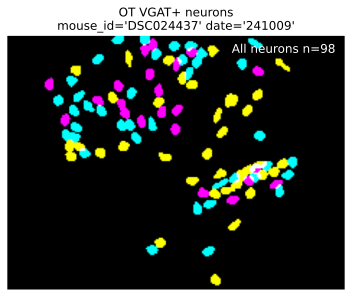

In [4]:

# where we have the cell map tiff files
dirname = '/Users/hunglo/Desktop/DSC024437_241009'
mouse_id = 'DSC024437'
date = '241009'

files = os.listdir(dirname)
files = [file for file in files if '.tiff' in file]
files = sorted(np.array([file for file in files if 'accepted' not in file])) # removed all_accepted_map

## corresponding ca2+ trace
import pandas as pd
df_ca2 = pd.read_csv('/Users/hunglo/Documents/inscopix_csv/2024_TuS/ca2_csv/DSC024437241009_celltraces-props.csv')
accepted_cell_list = df_ca2[df_ca2['Status']=='accepted']['Name'].values

files = [file for file in files if file.split('.tiff')[0].split('_')[-1] in accepted_cell_list]

final = []

for fname in files:
    im = Image.open(os.path.join(dirname, fname))
    imarray = np.array(im)
    final.append(imarray)

final = np.asarray(final)
fig, ax = plt.subplots(figsize=(5,5))
## make an eroded cell map for visualization
plot_composite_fov(erode_footprint(final,99.9), colormap='gist_rainbow',ax=ax)
ax.set_title(f'OT VGAT+ neurons\n{mouse_id=} {date=}')
ax.set_axis_off()
plt.tight_layout()


In [5]:

## make a classification function here based on auROC
def checkConsecutive(l,n=3):
    n = n-1 # diff will be one less than all elements in the list
    return (sum(np.diff(sorted(l)) == 1) >= n) 

def cell_class(auroc,window=2,threshold_sd=2):
   consecutive_n = 3
   idx_positive = []
   idx_negative = []
   frate = 10
   for idx in range(auroc.shape[0]):
    threshold_high = np.mean(auroc[idx,40:50]) + np.std(auroc[idx,40:50])*threshold_sd
    auroc_temp = auroc[idx].copy()
    j_temp = []
    for j in range(50,50+int(window*frate)):  # Only look at first 2 sec after delivery (the window size)
        if auroc_temp[j] > threshold_high:
           j_temp.append(j)
    if j_temp !=[]:
        if checkConsecutive(j_temp,n=consecutive_n) == True:
           idx_positive.append(idx)
      # print('# {} is responding to milk'.format(idx))
   for idx in range(auroc.shape[0]):
    threshold_high = np.mean(auroc[idx,40:50]) - np.std(auroc[idx,40:50])*threshold_sd
    auroc_temp = auroc[idx].copy()
    j_temp = []
    for j in range(50,50+int(window*frate)):  # Only look at first 2 sec after delivery (the window size)
        if auroc_temp[j] < threshold_high:
           j_temp.append(j)
    if j_temp !=[]:
        if checkConsecutive(j_temp,n=consecutive_n) == True:
           idx_negative.append(idx)
      # print('# {} is responding to milk'.format(idx))
   ## make idx for non-responding neurons
   cellnum = auroc.shape[0]
   idx_non = []
   idx_non = [i for i in range(cellnum) if i not in idx_positive and i not in idx_negative]
   return idx_positive, idx_negative, idx_non

In [6]:

# where we have the cell map tiff files
dirname = '/Users/hunglo/Desktop/DSC023281_240424_aPC'
mouse_id = 'DSC023281'
date = '240424'

## load auroc npy

auroc_P1  = np.load(f'/Users/hunglo/Documents/inscopix_csv/2024_aPC/auroc_npy/{mouse_id}_{date}_auroc_P1.npy',allow_pickle=True)
auroc_P1C = np.load(f'/Users/hunglo/Documents/inscopix_csv/2024_aPC/auroc_npy/{mouse_id}_{date}_auroc_P1C.npy',allow_pickle=True)
auroc_P1D = np.load(f'/Users/hunglo/Documents/inscopix_csv/2024_aPC/auroc_npy/{mouse_id}_{date}_auroc_P1D.npy',allow_pickle=True)

## set positive idx
P1D_idx_positive, idx_negative, idx_non = cell_class(auroc_P1D,window=2,threshold_sd=2)
P1C_idx_positive, idx_negative, idx_non = cell_class(auroc_P1C,window=2,threshold_sd=2)
P1_idx_positive, idx_negative, idx_non  = cell_class(auroc_P1, window=2,threshold_sd=2)

print(len(P1D_idx_positive),len(P1C_idx_positive),len(P1_idx_positive))

## find overlaps
P1D_P1C_idx     = [idx for idx in P1D_idx_positive if idx in P1C_idx_positive and idx not in P1_idx_positive]
P1D_P1_idx      = [idx for idx in P1D_idx_positive if idx in P1_idx_positive and idx not in P1C_idx_positive]
P1C_P1_idx      = [idx for idx in P1C_idx_positive if idx in P1_idx_positive and idx not in P1D_idx_positive]
P1D_P1C_P1_idx  = [idx for idx in P1D_idx_positive if idx in P1_idx_positive and idx in P1C_idx_positive]

## removed overlaps
P1D_idx_positive_filter = [idx for idx in P1D_idx_positive if idx not in P1C_idx_positive and idx not in P1_idx_positive]
P1C_idx_positive_filter = [idx for idx in P1C_idx_positive if idx not in P1D_idx_positive and idx not in P1_idx_positive]
P1_idx_positive_filter  = [idx for idx in P1_idx_positive  if idx not in P1C_idx_positive and idx not in P1D_idx_positive]

print(len(P1D_idx_positive_filter),len(P1C_idx_positive_filter),len(P1_idx_positive_filter))

46 56 53
32 46 38


/var/folders/tr/w74ws6917z15hn3t5x_l367r0000gn/T/ipykernel_73355/4176286288.py:155: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_vals = cm.get_cmap(colormap)


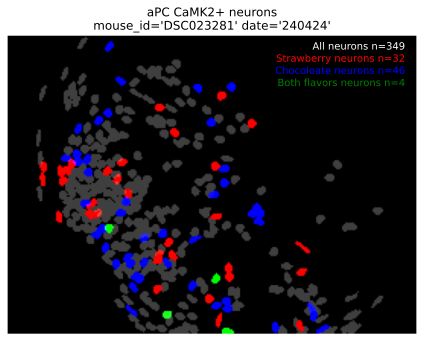

In [7]:
## get cell names with idx

files = os.listdir(dirname)
files = [file for file in files if '.tif' in file] ## somehow this one is tif not tiff
files = sorted(np.array([file for file in files if 'accepted' not in file])) # removed all_accepted_map
files

## corresponding ca2+ trace
import pandas as pd

df_ca2 = pd.read_csv('/Users/hunglo/Documents/inscopix_csv/2024_aPC/ca2_csv/DSC023281240424_celltraces-props.csv')
accepted_cell_list = df_ca2[df_ca2['Status']=='accepted']['Name'].values

files = [file for file in files if file.split('.tif')[0].split('_')[-1] in accepted_cell_list]

# print(len(files))
# label_idx = accepted_cell_list[P1D_idx_positive_filter]
label_idx_1 = P1D_idx_positive_filter
label_idx_2 = P1C_idx_positive_filter
label_idx_3 = P1D_P1C_idx

final = []

for fname in files:
    im = Image.open(os.path.join(dirname, fname))
    imarray = np.array(im)
    final.append(imarray)

final = np.asarray(final)

# print(final.shape)

fig, ax = plt.subplots(figsize=(6,6))
## make an eroded cell map for visualization
plot_composite_fov_label_2(erode_footprint(final,99.95), colormap='grey',ax=ax,label_idx_1=label_idx_1,label_idx_2=label_idx_2,label_idx_3=label_idx_3)
ax.set_title(f'aPC CaMK2+ neurons\n{mouse_id=} {date=}')
ax.set_axis_off()
plt.tight_layout()

/var/folders/tr/w74ws6917z15hn3t5x_l367r0000gn/T/ipykernel_73355/4176286288.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_vals = cm.get_cmap(colormap)


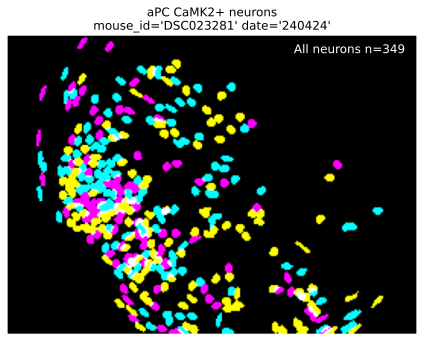

In [8]:
## get cell names with idx

files = os.listdir(dirname)
files = [file for file in files if '.tif' in file] ## somehow this one is tif not tiff
files = sorted(np.array([file for file in files if 'accepted' not in file])) # removed all_accepted_map
files

## corresponding ca2+ trace
import pandas as pd

df_ca2 = pd.read_csv('/Users/hunglo/Documents/inscopix_csv/2024_aPC/ca2_csv/DSC023281240424_celltraces-props.csv')
accepted_cell_list = df_ca2[df_ca2['Status']=='accepted']['Name'].values

files = [file for file in files if file.split('.tif')[0].split('_')[-1] in accepted_cell_list]

# print(len(files))
# label_idx = accepted_cell_list[P1D_idx_positive_filter]
label_idx_1 = P1D_idx_positive_filter
label_idx_2 = P1C_idx_positive_filter
label_idx_3 = P1_idx_positive_filter
label_idx_4 = P1D_P1C_idx + P1C_P1_idx + P1D_P1_idx # 2 flavors
label_idx_5 = P1D_P1C_P1_idx # 3 flavors


final = []

for fname in files:
    im = Image.open(os.path.join(dirname, fname))
    imarray = np.array(im)
    final.append(imarray)

final = np.asarray(final)

# print(final.shape)

fig, ax = plt.subplots(figsize=(6,6))
## make an eroded cell map for visualization
plot_composite_fov(erode_footprint(final,99.95), colormap='gist_rainbow',ax=ax)
ax.set_title(f'aPC CaMK2+ neurons\n{mouse_id=} {date=}')
ax.set_axis_off()
plt.tight_layout()

In [105]:
## try new way of plotting that show 4 colors of labeling
import seaborn as sns
my_color_map = ['#56b4e9',
                '#e69f00',
                '#009e73',
                '#f0e442',
                '#0072b2',
                '#d55e00',
                '#cc79a7']
# convert to sns plotting rgb
my_color_map = sns.color_palette(my_color_map)


def plot_composite_fov_new(footprints, ax = None,label_idx_1=[],label_idx_2=[],label_idx_3=[],label_idx_4=[],label_idx_5=[]):
    '''
    Plots all footprints on a single composite field of view.
    
    Args:
        footprints (array):
            n_cells x rows x columns array of footprints
        colormap (str, optional)
            Colormap to use. Each cell will be assigned a random color from this map (defaults to 'gist_rainbow').
    Returns:
        tuple of fig, ax
            fig = matplotlib figure handle
            ax = matplotlib axis handle
    '''
    
    # fig, ax = plt.subplots(figsize=(6,6))
    
    # start with an array of zeros
    composite_fov = np.zeros((footprints.shape[1], footprints.shape[2], 3))
    ## flatten footprints
    footprints[np.where(footprints>0)]=1 # so we don't have shades here any more, meaning we can drop the normalization later

    for cell_id in range(footprints.shape[0]):
        # select a random color for this cell
        # color = cmap_vals(np.random.rand())
        # print(color)
        if cell_id not in (label_idx_1+label_idx_2+label_idx_3+label_idx_4+label_idx_5):
            for color_channel in range(3):
                composite_fov[:,:,color_channel] += 0.2*footprints[cell_id] # make it grey
    composite_fov[np.where(composite_fov > 0)] = 0.2 # make it half bright and take care of overlapping ones

    for cell_id in range(footprints.shape[0]): # do this again so that we don't have overlapping issues again
        if cell_id in label_idx_1: # label as light blue
            composite_fov[:,:,0] += 0.34*footprints[cell_id]
            composite_fov[:,:,1] += 0.71*footprints[cell_id] 
            composite_fov[:,:,2] += 0.91*footprints[cell_id] 
        elif cell_id in label_idx_2: # label as orange
            composite_fov[:,:,0] += 0.90*footprints[cell_id]
            composite_fov[:,:,1] += 0.62*footprints[cell_id] 
            composite_fov[:,:,2] += 0*footprints[cell_id] 
        elif cell_id in label_idx_3: # label as green
            composite_fov[:,:,0] += 0*footprints[cell_id]
            composite_fov[:,:,1] += 0.62*footprints[cell_id] 
            composite_fov[:,:,2] += 0.45*footprints[cell_id] 
        elif cell_id in label_idx_4: # label as amber
            composite_fov[:,:,0] += 0.96*footprints[cell_id]
            composite_fov[:,:,1] += 0.78*footprints[cell_id] 
            composite_fov[:,:,2] += 0.06*footprints[cell_id] 
        elif cell_id in label_idx_5: # label as white
            composite_fov[:,:,0] += 1*footprints[cell_id]
            composite_fov[:,:,1] += 1*footprints[cell_id] 
            composite_fov[:,:,2] += 1*footprints[cell_id]

    # # show the image
    ax.imshow(composite_fov)
    ax.text(x=footprints.shape[2]*0.97,y=10,s=f'All neurons n={footprints.shape[0]}',color='grey',ha='right',va='bottom')
    ax.text(x=footprints.shape[2]*0.97,y=18,s=f'Strawberry neurons n={(len(label_idx_1))}',color=my_color_map[0],ha='right',va='bottom')
    ax.text(x=footprints.shape[2]*0.97,y=26,s=f'Chocoloate neurons n={(len(label_idx_2))}',color=my_color_map[1],ha='right',va='bottom')
    ax.text(x=footprints.shape[2]*0.97,y=34,s=f'Sucrose neurons n={(len(label_idx_3))}',color=my_color_map[2],ha='right',va='bottom')
    ax.text(x=footprints.shape[2]*0.97,y=42,s=f'2-flavor neurons n={(len(label_idx_4))}',color=my_color_map[3],ha='right',va='bottom')
    ax.text(x=footprints.shape[2]*0.97,y=50,s=f'3-flavor neurons n={(len(label_idx_5))}',color='w',ha='right',va='bottom')

    # ax.text(x=footprints.shape[2]*0.97,y=34,s=f'Both flavors neurons n={(len(label_idx_3))}',color='green',ha='right',va='bottom')
        
    # fig.tight_layout()
    return ax

46 56 53
32 46 38


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


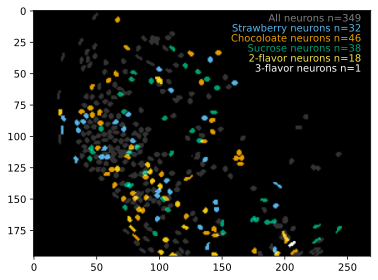

In [115]:
## all together here

# where we have the cell map tiff files
dirname = '/Users/hunglo/Desktop/DSC023281_240424_aPC'
mouse_id = 'DSC023281'
date = '240424'

files = os.listdir(dirname)
files = [file for file in files if '.tif' in file] ## somehow this one is tif not tiff
files = sorted(np.array([file for file in files if 'accepted' not in file])) # removed all_accepted_map
# files

## corresponding ca2+ trace
import pandas as pd

df_ca2 = pd.read_csv('/Users/hunglo/Documents/inscopix_csv/2024_aPC/ca2_csv/DSC023281240424_celltraces-props.csv')
accepted_cell_list = df_ca2[df_ca2['Status']=='accepted']['Name'].values

files = [file for file in files if file.split('.tif')[0].split('_')[-1] in accepted_cell_list] # remove merged cellmaps

final = [] # concatenate cell maps into 3-d array
for fname in files:
    im = Image.open(os.path.join(dirname, fname))
    imarray = np.array(im)
    final.append(imarray)

final = np.asarray(final)

## load auroc npy 
auroc_P1  = np.load(f'/Users/hunglo/Documents/inscopix_csv/2024_aPC/auroc_npy/{mouse_id}_{date}_auroc_P1.npy',allow_pickle=True)
auroc_P1C = np.load(f'/Users/hunglo/Documents/inscopix_csv/2024_aPC/auroc_npy/{mouse_id}_{date}_auroc_P1C.npy',allow_pickle=True)
auroc_P1D = np.load(f'/Users/hunglo/Documents/inscopix_csv/2024_aPC/auroc_npy/{mouse_id}_{date}_auroc_P1D.npy',allow_pickle=True)

## set positive idx
P1D_idx_positive, idx_negative, idx_non = cell_class(auroc_P1D,window=2,threshold_sd=2)
P1C_idx_positive, idx_negative, idx_non = cell_class(auroc_P1C,window=2,threshold_sd=2)
P1_idx_positive, idx_negative, idx_non  = cell_class(auroc_P1, window=2,threshold_sd=2)

print(len(P1D_idx_positive),len(P1C_idx_positive),len(P1_idx_positive))

## find overlaps
P1D_P1C_idx     = [idx for idx in P1D_idx_positive if idx in P1C_idx_positive and idx not in P1_idx_positive]
P1D_P1_idx      = [idx for idx in P1D_idx_positive if idx in P1_idx_positive and idx not in P1C_idx_positive]
P1C_P1_idx      = [idx for idx in P1C_idx_positive if idx in P1_idx_positive and idx not in P1D_idx_positive]
P1D_P1C_P1_idx  = [idx for idx in P1D_idx_positive if idx in P1_idx_positive and idx in P1C_idx_positive]

## removed overlaps
P1D_idx_positive_filter = [idx for idx in P1D_idx_positive if idx not in P1C_idx_positive and idx not in P1_idx_positive]
P1C_idx_positive_filter = [idx for idx in P1C_idx_positive if idx not in P1D_idx_positive and idx not in P1_idx_positive]
P1_idx_positive_filter  = [idx for idx in P1_idx_positive  if idx not in P1C_idx_positive and idx not in P1D_idx_positive]

print(len(P1D_idx_positive_filter),len(P1C_idx_positive_filter),len(P1_idx_positive_filter))

label_idx_1 = P1D_idx_positive_filter
label_idx_2 = P1C_idx_positive_filter
label_idx_3 = P1_idx_positive_filter
label_idx_4 = P1D_P1C_idx + P1C_P1_idx + P1D_P1_idx # 2 flavors
label_idx_5 = P1D_P1C_P1_idx # 3 flavors

fig,ax = plt.subplots(figsize=[6,4])
plot_composite_fov_new(erode_footprint(final,99.975),ax=ax,label_idx_1=label_idx_1,label_idx_2=label_idx_2,label_idx_3=label_idx_3,label_idx_4=label_idx_4,label_idx_5=label_idx_5)
plt.tight_layout()
